<h1>The analysis of a real-world phenomenon for Programming for Data Analysis.<h1>








##   Introductory remarks.


A data set shall be interpreted as a collection of statistical data which is usually included in a tabulated form. It is important to mention that most often, the columns correspond to the observed statistical characteristics and each row describes one observation from the sample. The matrix cell values describe the implementation of variable data in subsequent observations.


The purpose of this project is to research the data set and write documentation and code (in Python programming language) to investigate it. It`s important to mention that Data scientist can be interpreted as a process of experimentation and exploration to find answers. Therefore, data science pursues the various scientific method. The data science process includes steps particular to working with large, digital datasets. Before the real-world phenomenon was choose, myself, as every scientist needed to follow crucial steps:

- Determine the necessary data;
- Get the data;
- Clean and organize the data;
- Explore the data;
- Model the data;
- Communicate findings.

Every of each modeling and synthesise have to include the above steps of analysis. In this project three aspects are taken into account: data scope, variable relationships and data context. 



## Determine the necessary data.

In this state of affairs, it has been used the Canada Cities Database. This is up-to-date (November 18th 2020) database of Canada cities and towns. 
The second set is the Users Data which includes information about my users, such as: education, age and location. 
As an example of a hypothesis which proofs that my data are necessary to collect is a question: is there a correlation between a user’s location (rural or urban) and their age
? Based on provided data, it can be defined what is rural and urban location as data sets don`t determine that information. 
Determination process helps to approve or disprove particular hypotesis and helps to define how much data are needed to collect. 
To do this, it can be used sample size calculators (available online). They shows: Margin of error, Confidence level, Population size Likely sample proportion.
As all data sets for this project have more than 200 entries, they met project`s criteria.




## Get the data.
This project requires passive data collection, which means they are already exist. It uses data from the Simple Maps website contains a Canada Cities database (the proper link has been included in the List of sources). As it was mentioned above, the project requires to cross-reference of 2 provided data sets. The 2 files: pop_data.csv (Canada Cities Database) and user_data.csv (details of the users) are attached to repository. 


## Clean and organize the data.





In [1]:
#importing relevant libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Import the 2 CSV files and create the DataFrames:
user_data = pd.read_csv("user_data.csv")
pop_data = pd.read_csv("pop_data.csv")

# becasue of Panda library the set can be transform to a table (showing 15records):

print(user_data.head(15))
print(pop_data.head(15))






           city        education  age
0       Toronto          college   31
1      Montréal  graduate degree   31
2     Vancouver  graduate degree   32
3       Calgary          college   37
4      Edmonton          college   21
5        Ottawa          college   25
6   Mississauga  graduate degree   29
7      Winnipeg          college   29
8   Quebec City          college   27
9      Hamilton  graduate degree   28
10     Brampton          college   31
11       Surrey  graduate degree   31
12    Kitchener          college   31
13        Laval      high school   31
14      Halifax      high school   31
           city  population
0       Toronto     5429524
1      Montréal     3519595
2     Vancouver     2264823
3       Calgary     1239220
4      Edmonton     1062643
5        Ottawa      989567
6   Mississauga      721599
7      Winnipeg      705244
8   Quebec City      705103
9      Hamilton      693645
10     Brampton      593638
11       Surrey      517887
12    Kitchener      470015


In [4]:
#now I need to merge both files in order to analyse the abobe hypothesis. I will use Panda`s modulde: merging 
new_df = pd.merge(user_data, pop_data)


#now I am testing my code:
print(new_df.head(15))




           city        education  age  population
0       Toronto          college   31     5429524
1      Montréal  graduate degree   31     3519595
2     Vancouver  graduate degree   32     2264823
3       Calgary          college   37     1239220
4      Edmonton          college   21     1062643
5        Ottawa          college   25      989567
6   Mississauga  graduate degree   29      721599
7      Winnipeg          college   29      705244
8   Quebec City          college   27      705103
9      Hamilton  graduate degree   28      693645
10     Brampton          college   31      593638
11       Surrey  graduate degree   31      517887
12    Kitchener          college   31      470015
13        Laval      high school   31      422993
14      Halifax      high school   31      403131


In [5]:
#as the code is working, I have to analyse size of the population. I will do that by creating a new field 'location' which classifieds rural or urban place (based on available population from Canada cities set).

new_df.loc[new_df.population < 100000, "location"] = "rural"
new_df.loc[new_df.population >= 100000, "location"] = "urban"

print(new_df.head(100))

# so now I can see appropriate relations between location 




               city        education  age  population location
0           Toronto          college   31     5429524    urban
1          Montréal  graduate degree   31     3519595    urban
2         Vancouver  graduate degree   32     2264823    urban
3           Calgary          college   37     1239220    urban
4          Edmonton          college   21     1062643    urban
..              ...              ...  ...         ...      ...
95       St. Thomas  graduate degree   25       61707    rural
96          Airdrie  graduate degree   26       61581    rural
97     Halton Hills          college   27       61161    rural
98  Saint-Hyacinthe  graduate degree   28       59614    rural
99        Lac-Brome          college   29       58889    rural

[100 rows x 5 columns]


## Explore the data.
The data has been organized and defined. Exploring data process provides proper understanding how the data work and help to determine if any changes are required. 
It can be done by Statistical calculations and Data visualizations.
Statistical description can be based on the Python NumPy, which provides descriptive statistical calculation. The code below calculates the mean of a dataset.




In [7]:
np.mean(new_df)

age               29.217593
population    155454.587963
dtype: float64

The Data visualization is another way to provide a sense of a data set. In this case I shall be able to present patterns, relationships and also outliers.
The code below shows the age of the users. I am presenting that by a histogram to visualize the distribution of all the ages in my dataset.


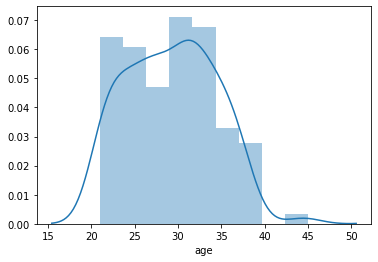

In [9]:
age = new_df["age"]
sns.distplot(age)
 
plt.show() 
#this shows that age is represented by relative amounts of people with each age. The majority of people will be middleaged, with fewer young and very few old. 


In [11]:
#this shows that age is represented by relative amounts of people with each age. The majority of people will be middleaged, with fewer young and very few old. 


location_mean_age = new_df.groupby('location').age.mean() # turns it into a series
location_mean_age.head()



location
rural    29.440252
urban    28.596491
Name: age, dtype: float64

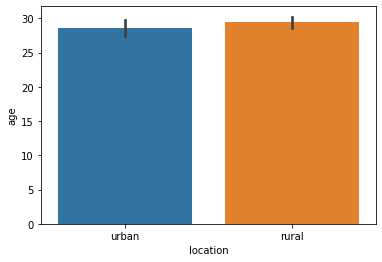

In [12]:
#let`s see visualization of the above:   
plt.close()
sns.barplot(
    data=new_df,
    x= "location",
    y= "age"
)
plt.show()


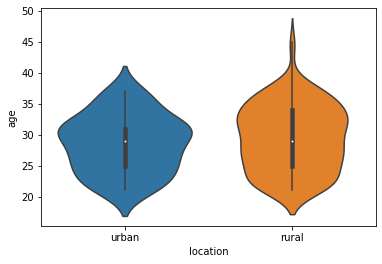

In [13]:
plt.close()
sns.violinplot(x="location", y="age", data=new_df)
 
plt.show()

# a violinplot creates separate distributions for each category. 

## Model the data. 

In order to do a proper analysis, a model has to be created. In this state of affairs, the model presents relationship between two variables: population and age.
The code below let me to understand the relationship between age and location - if age is dependent on location.


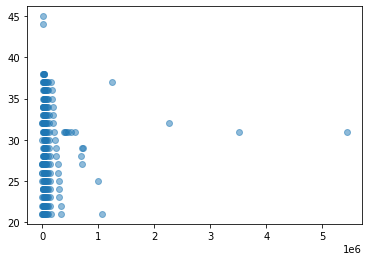

In [18]:
x = new_df["population"]
y = new_df["age"]
 
plt.scatter(x, y, alpha=0.5)
#scatter plot, which plots data on a graph based on two variables

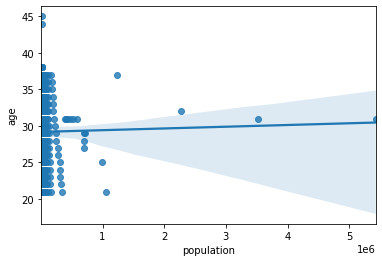

In [20]:

#In this case, very usefull will be a linear regression. This model can be used for a new user to prtedict the age of a population (Seaborn in use). 

sns.regplot(x="population", y="age", data=new_df)
plt.show()
 


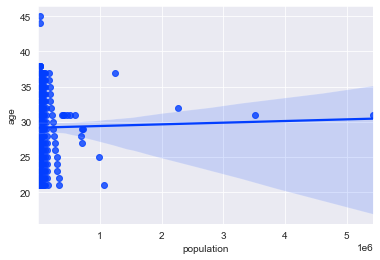

In [23]:
##here I am changing colors to make my model more expressive

plt.close()
 
sns.set_style("darkgrid")
sns.set_palette("bright")
sns.despine()
 
sns.regplot(x="population", y="age", data=new_df)
 
plt.show()

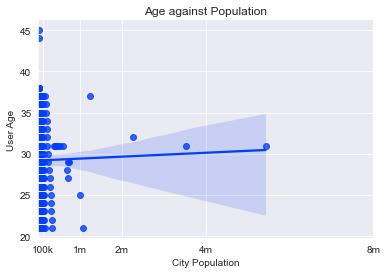

In [24]:
# Now I need to make my visualizations snazzy! 

# Linear regression plot:
sns.regplot(data=new_df, x="population", y="age")

# Change the axes, so they're eaiser to undersatnd:
ax = plt.subplot(1, 1, 1)
ax.set_xticks([100000, 1000000, 2000000, 4000000, 8000000])
ax.set_xticklabels(['100k', '1m', '2m','4m', '8m'])


# Change the figure style and palette:
sns.set_style("white")
sns.set_palette("pastel")
sns.despine()


# Title the axes and plot: 
ax.set_xlabel("City Population") 
ax.set_ylabel("User Age") 
plt.title("Age against Population")


plt.show()

# List of sources.

***

<b> 1) DOCUMENTS AND REPORTS.</b>

Datasets: 
<http://www.cs.toronto.edu/~delve/data/>

UCI Machine Learning Repository:
<http://archive.ics.uci.edu/ml/datasets/Iris>

NumPy Documentation:
<https://numpy.org/doc/stable/reference/random/>

NumPy v1.19 Manual:
<https://numpy.org/doc/stable/index.html>

NumPy in general:
<https://numpy.org/>


<b> 2) ARTICLES, MONOGRAPHS, STUDIES.</b>

Encyclopaedia Britannica: 
<http://www.britannica.com/>

Schweppes J., How to Think Write and Cite – key skills for Irish Law, Dublin 2011.

Waugh S., Extending and benchmarking Cascade-Correlation, Tasmania 1995.

Internet Resources: 

<https://www.w3schools.com/python/numpy_random.asp>

<https://www.geeksforgeeks.org/numpy-random-rand-python/>

<https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html>

<https://www.markdownguide.org/getting-started/>

<https://medium.com/@ingeh/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed>

<https://github.com/>

<https://en.wikipedia.org/wiki/Triangular_distribution>

<https://gitter.im/GMIT-Python-Learners-2019/community>

<https://docs.python.org/3/tutorial/>

<https://leanpub.com/pyprog/read>

<https://www.codecademy.com/courses/data-visualization-python/lessons/matplotlib-i/exercises/introduction-matplotlib-i>

<http://www.cs.nott.ac.uk/~pszgmh/counting.pdf>

<https://simplemaps.com/data/us-cities>

<https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html>

<https://medium.com/@ingeh/markdown-for-jupyter-notebooks-cheatsheet-386c05aeebed#:~:text=Bullets%3A%20Use%20the%20dash%20sign,Numbered%20lists%3A%20Start%20with%201.>





